#Section 3


---

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

from keras.utils import np_utils, to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D , Activation, Flatten , Dense, MaxPooling2D, UpSampling2D
from tensorflow.keras.layers import Dropout

from keras.layers.normalization import BatchNormalization
 
from keras.constraints import max_norm

from keras.datasets import mnist 

In [ ]:
def load_data():
    
    return mnist.load_data()

In [ ]:
def prepare_data(train_images, train_labels, test_images, test_labels):

    x_train = train_images.reshape(60000,28,28,1)

    x_test = test_images.reshape(10000,28,28,1)

    #one hot encoding
    y_train =  to_categorical(train_labels) 
    y_test = to_categorical(test_labels)

    return (x_train, y_train, x_test, y_test )

In [ ]:
def add_noise(x_train, x_test, noise_factor_train, noise_factor_test):

    x_train_noisy = x_train + noise_factor_train * np.random.normal(loc=0.0, scale=1.0, size=x_train.shape) 
    x_test_noisy = x_test + noise_factor_test * np.random.normal(loc=0.0, scale=1.0, size=x_test.shape) 

    x_train_noisy = np.clip(x_train_noisy, 0., 1.)
    x_test_noisy = np.clip(x_test_noisy, 0., 1.)

    return x_train_noisy, x_test_noisy

In [ ]:
def model(x_train, y_train, x_test, y_test):
    
    model = Sequential()
    #encoder
    model.add(Conv2D(16, kernel_size=3, activation='relu',padding='same', input_shape=(28,28,1)))
    model.add(MaxPooling2D(pool_size=(2,2)))
    model.add(Conv2D(8, kernel_size=3, padding='same',activation='relu'))
    model.add(MaxPooling2D(pool_size=(2,2),padding='same'))
    model.add(Conv2D(8, kernel_size=3,padding='same', activation='relu'))
    model.add(MaxPooling2D(pool_size=(2,2), padding='same'))

    #decoder
    model.add(Conv2D(8, kernel_size=3, activation='relu',padding='same'))
    model.add(UpSampling2D(size=(2,2)))
    model.add(Conv2D(8, kernel_size=3, padding='same',activation='relu'))
    model.add(UpSampling2D(size=(2,2)))
    model.add(Conv2D(16, kernel_size=3,padding='same', activation='relu'))
    model.add(UpSampling2D(size=(2,2)))

    model.add(Flatten())
    model.add(Dense(64, activation='relu'))
    model.add(Dense(10, activation='softmax'))

    model.summary()

    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

    history = model.fit(x_train, y_train,
            batch_size=2048, epochs=50 , verbose=1,
            validation_data=(x_train, y_train))
    
    score = model.evaluate(x_test, y_test)
    print('Test loss :', score[0])
    print('Test accuracy:', score[1] * 100)

    return history

In [ ]:
def show_result(x_test_noisy, test_images):
    n = 10
    for i in range(n):
        # Display original
        ax = plt.subplot(2, n, i + 1)
        plt.imshow(test_images[i].reshape(28, 28))
        plt.gray()
        ax.get_xaxis().set_visible(False)
        ax.get_yaxis().set_visible(False)

        # Display noisy 
        ax = plt.subplot(2, n, i + 1)
        plt.imshow(x_test_noisy[i].reshape(28, 28))
        plt.gray()
        ax.get_xaxis().set_visible(False)
        ax.get_yaxis().set_visible(False)

    plt.show()

In [ ]:
def plot(history):
    plt.plot(history.history['accuracy'])
    plt.plot(history.history['val_accuracy'])
    plt.title('model accuracy')
    plt.ylabel('accuracy')
    plt.xlabel('epoch')
    plt.legend(['train', 'test'], loc='upper left')
    plt.show()
    # summarize history for loss
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title('model loss')
    plt.ylabel('loss')
    plt.xlabel('epoch')
    plt.legend(['train', 'test'], loc='upper left')
    plt.show()

In [ ]:
def main(noise_factor_train = 0.4, noise_factor_test = 0.7):

    (train_images, train_labels), (test_images, test_labels) = load_data()

    x_train, y_train, x_test, y_test = prepare_data(train_images, train_labels, test_images, test_labels)
    
    x_train_noisy, x_test_noisy = add_noise(x_train, x_test, noise_factor_train, noise_factor_test)

    history = model(x_train_noisy, y_train, x_test_noisy, y_test)
    
    show_result(x_train_noisy, x_test_noisy)

    plot(history)

Model: "sequential_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_36 (Conv2D)           (None, 28, 28, 16)        160       
_________________________________________________________________
max_pooling2d_24 (MaxPooling (None, 14, 14, 16)        0         
_________________________________________________________________
conv2d_37 (Conv2D)           (None, 14, 14, 8)         1160      
_________________________________________________________________
max_pooling2d_25 (MaxPooling (None, 7, 7, 8)           0         
_________________________________________________________________
conv2d_38 (Conv2D)           (None, 7, 7, 8)           584       
_________________________________________________________________
max_pooling2d_26 (MaxPooling (None, 4, 4, 8)           0         
_________________________________________________________________
conv2d_39 (Conv2D)           (None, 4, 4, 8)          

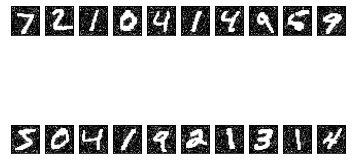

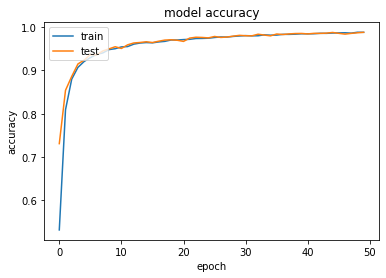

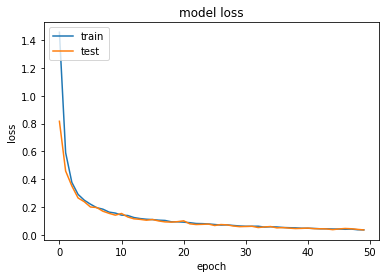

In [ ]:
main(noise_factor_train = 0.3, noise_factor_test = 0.3)

Model: "sequential_10"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_48 (Conv2D)           (None, 28, 28, 16)        160       
_________________________________________________________________
max_pooling2d_30 (MaxPooling (None, 14, 14, 16)        0         
_________________________________________________________________
conv2d_49 (Conv2D)           (None, 14, 14, 8)         1160      
_________________________________________________________________
max_pooling2d_31 (MaxPooling (None, 7, 7, 8)           0         
_________________________________________________________________
conv2d_50 (Conv2D)           (None, 7, 7, 8)           584       
_________________________________________________________________
max_pooling2d_32 (MaxPooling (None, 4, 4, 8)           0         
_________________________________________________________________
conv2d_51 (Conv2D)           (None, 4, 4, 8)         

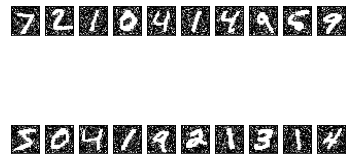

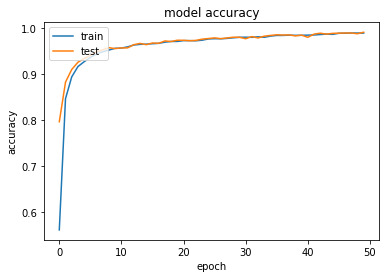

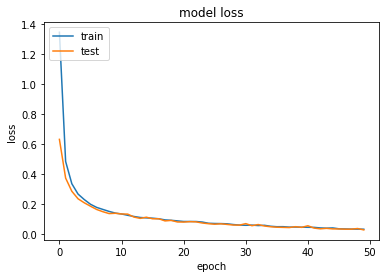

In [ ]:
main(noise_factor_train = 0.5, noise_factor_test = 0.5)

Model: "sequential_11"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_54 (Conv2D)           (None, 28, 28, 16)        160       
_________________________________________________________________
max_pooling2d_33 (MaxPooling (None, 14, 14, 16)        0         
_________________________________________________________________
conv2d_55 (Conv2D)           (None, 14, 14, 8)         1160      
_________________________________________________________________
max_pooling2d_34 (MaxPooling (None, 7, 7, 8)           0         
_________________________________________________________________
conv2d_56 (Conv2D)           (None, 7, 7, 8)           584       
_________________________________________________________________
max_pooling2d_35 (MaxPooling (None, 4, 4, 8)           0         
_________________________________________________________________
conv2d_57 (Conv2D)           (None, 4, 4, 8)         

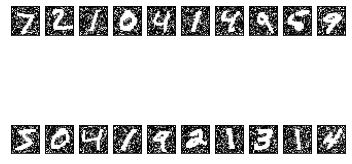

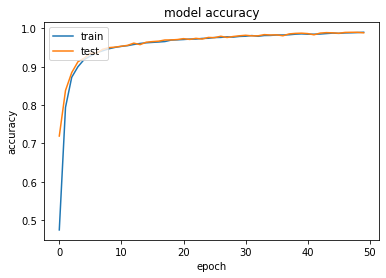

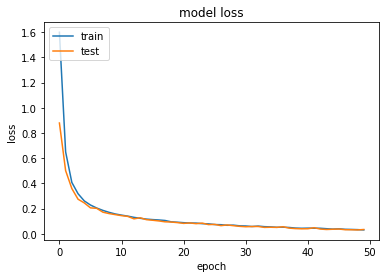

In [ ]:
main(noise_factor_train = 0.7, noise_factor_test = 0.7)

Model: "sequential_12"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_60 (Conv2D)           (None, 28, 28, 16)        160       
_________________________________________________________________
max_pooling2d_36 (MaxPooling (None, 14, 14, 16)        0         
_________________________________________________________________
conv2d_61 (Conv2D)           (None, 14, 14, 8)         1160      
_________________________________________________________________
max_pooling2d_37 (MaxPooling (None, 7, 7, 8)           0         
_________________________________________________________________
conv2d_62 (Conv2D)           (None, 7, 7, 8)           584       
_________________________________________________________________
max_pooling2d_38 (MaxPooling (None, 4, 4, 8)           0         
_________________________________________________________________
conv2d_63 (Conv2D)           (None, 4, 4, 8)         

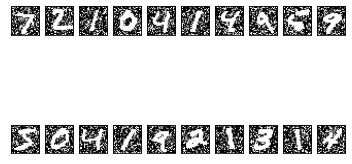

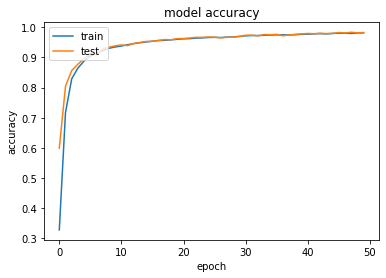

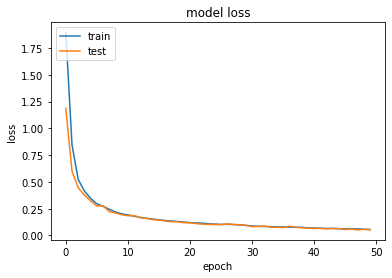

In [ ]:
main(noise_factor_train = 0.9, noise_factor_test = 0.9)

Model: "sequential_13"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_66 (Conv2D)           (None, 28, 28, 16)        160       
_________________________________________________________________
max_pooling2d_39 (MaxPooling (None, 14, 14, 16)        0         
_________________________________________________________________
conv2d_67 (Conv2D)           (None, 14, 14, 8)         1160      
_________________________________________________________________
max_pooling2d_40 (MaxPooling (None, 7, 7, 8)           0         
_________________________________________________________________
conv2d_68 (Conv2D)           (None, 7, 7, 8)           584       
_________________________________________________________________
max_pooling2d_41 (MaxPooling (None, 4, 4, 8)           0         
_________________________________________________________________
conv2d_69 (Conv2D)           (None, 4, 4, 8)         

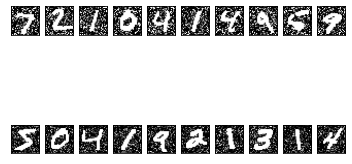

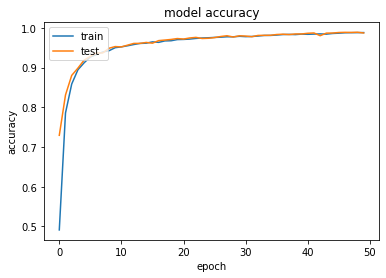

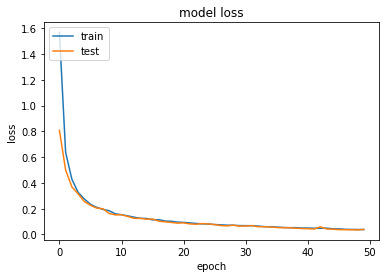

In [ ]:
main(noise_factor_train = 0.4, noise_factor_test = 0.7)

Model: "sequential_14"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_72 (Conv2D)           (None, 28, 28, 16)        160       
_________________________________________________________________
max_pooling2d_42 (MaxPooling (None, 14, 14, 16)        0         
_________________________________________________________________
conv2d_73 (Conv2D)           (None, 14, 14, 8)         1160      
_________________________________________________________________
max_pooling2d_43 (MaxPooling (None, 7, 7, 8)           0         
_________________________________________________________________
conv2d_74 (Conv2D)           (None, 7, 7, 8)           584       
_________________________________________________________________
max_pooling2d_44 (MaxPooling (None, 4, 4, 8)           0         
_________________________________________________________________
conv2d_75 (Conv2D)           (None, 4, 4, 8)         

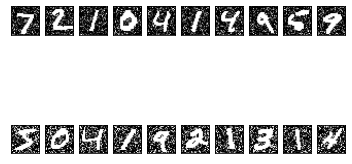

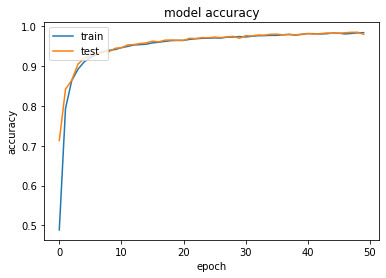

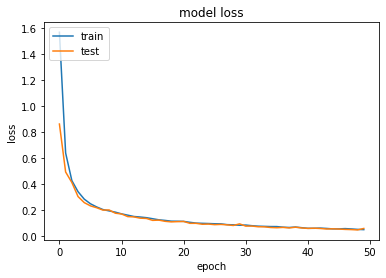

In [ ]:
main(noise_factor_train = 0.7, noise_factor_test = 0.4)